In [1]:
from util import *
from expval_calc_q_optim import *
from generate_training_set import *

from qiskit.utils import QuantumInstance 
from qiskit import Aer
import qiskit.providers.aer.noise as noise

import matplotlib.pyplot as plt

In [2]:
# Create appropriate instances
# Error probabilities
prob_1 = 0.01  # 1-qubit gate
prob_2 = 0.1   # 2-qubit gate

# Depolarizing quantum errors
error_1 = noise.depolarizing_error(prob_1, 1)
error_2 = noise.depolarizing_error(prob_2, 2)

# Add errors to noise model
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['u1', 'u2', 'u3'])
noise_model.add_all_qubit_quantum_error(error_2, ['cx'])

qasm_backend = Aer.get_backend('qasm_simulator')
em_instance = QuantumInstance(backend = qasm_backend, noise_model= noise_model, shots = 10000)
sv_backend = Aer.get_backend('aer_simulator_statevector')
ef_instance = QuantumInstance(backend = sv_backend)

In [4]:
# LBEM
seed = 100

group_pauli_op, [ansatz,num_par_gates] = main('H2', 0.774, 2, 1, 'simple')
group_pauli_op = group_pauli_op['grouped_paulis']
print('Ansatz & qubit hamiltonian created')

trunc_T, trunc_P = truncate_training_set(num_par_gates, 0, 0, s = seed, exhaustive= True)
circuit_list = get_circuits_dict(ansatz, trunc_T, trunc_P, num_par_gates)
print('Training circuits generated')

com_ef, com_em = expval_calc(group_pauli_op, circuit_list, em_instance, ef_instance)
print('All expectation values calculated')

q = q_optimize(group_pauli_op, circuit_list, com_em, com_ef)
print('q optimized')

Ansatz & qubit hamiltonian created
Training circuits generated
All expectation values calculated
q optimized


In [5]:
# Test using some random angles
angles = (2*np.pi/20) * np.array(list(range(20)))
efs = []
ems = []
ns = []

for angle in angles:
    ef_expval, em_expval, n_expval = test(ansatz, [angle], group_pauli_op, q, ef_instance, em_instance)
    print('Angle: {} | Error free value: {} | Error mitigated value: {} | Noisy value: {}'.format(angle, ef_expval, em_expval, n_expval))
    
    efs.append(ef_expval)
    ems.append(em_expval)
    ns.append(n_expval)

Angle: 0.0 | Error free value: (-0.3745864358278883+0j) | Error mitigated value: (-0.3749620460322215+0j) | Noisy value: (-0.2971292402856088+0j)
Angle: 0.3141592653589793 | Error free value: (-0.3562528707098897+0j) | Error mitigated value: (-0.35551772892688605+0j) | Noisy value: (-0.2916003379351948+0j)
Angle: 0.6283185307179586 | Error free value: (-0.3030467924471023+0j) | Error mitigated value: (-0.3051441398871263+0j) | Noisy value: (-0.24521654805261878+0j)
Angle: 0.9424777960769379 | Error free value: (-0.2201763826884337+0j) | Error mitigated value: (-0.21801261890625642+0j) | Noisy value: (-0.17820129267015816+0j)
Angle: 1.2566370614359172 | Error free value: (-0.1157535745331582+0j) | Error mitigated value: (-0.11979487147052303+0j) | Noisy value: (-0.08617462906831015+0j)
Angle: 1.5707963267948966 | Error free value: (-4.066342918994943e-17+0j) | Error mitigated value: (-0.004818354310117999+0j) | Noisy value: (-0.0026049719632555905+0j)
Angle: 1.8849555921538759 | Error f

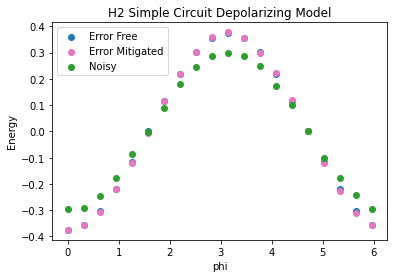

In [10]:
plt.scatter(angles, efs, c = 'tab:blue', label = 'Error Free')
plt.scatter(angles, ems, c = 'tab:pink', label = 'Error Mitigated')
plt.scatter(angles, ns, c = 'tab:green', label = 'Noisy')
plt.xlabel('phi')
plt.ylabel('Energy')
plt.title('H2 Simple Circuit Depolarizing Model')
plt.legend()

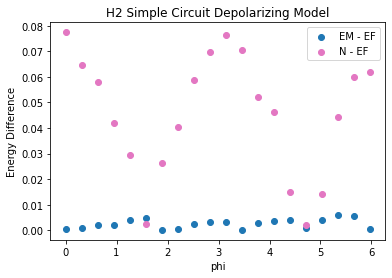

In [11]:
plt.scatter(angles, np.abs(np.array(ems) - np.array(efs)), c = 'tab:blue', label = 'EM - EF')
plt.scatter(angles, np.abs(np.array(ns) - np.array(efs)), c = 'tab:pink', label = 'N - EF')
plt.xlabel('phi')
plt.ylabel('Energy Difference')
plt.title('H2 Simple Circuit Depolarizing Model')
plt.legend()

In [8]:
q

(array([ 3.49665964e-01, -2.51002843e-01, -2.70346054e-01,  3.73223478e-01,
        -2.43321309e-04]),
 ['I', 'X', 'Y', 'Z', 'q0'])

In [9]:
ansatz.draw()

┌───┐     ┌─────────┐┌───┐
q_0: ┤ H ├──■──┤ Rx(phi) ├┤ X ├
     └───┘┌─┴─┐└─────────┘└─┬─┘
q_1: ─────┤ X ├─────────────■──
          └───┘